In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 4

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [46]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 84)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                1700      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1954 (7.63 KB)
Trainable params: 1954 (7.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [48]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [49]:
model.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/300
1/2 [==============>...............] - ETA: 1s - loss: 1.4778 - accuracy: 0.2188
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 2s 521ms/step - loss: 1.5098 - accuracy: 0.1814 - val_loss: 1.3806 - val_accuracy: 0.1842
Epoch 2/300
1/2 [==============>...............] - ETA: 0s - loss: 1.4990 - accuracy: 0.2188
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 143ms/step - loss: 1.4930 - accuracy: 0.1947 - val_loss: 1.3598 - val_accuracy: 0.1842
Epoch 3/300
1/2 [==============>...............] - ETA: 0s - loss: 1.4206 - accuracy: 0.2500
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 149ms/step - loss: 1.4313 - accuracy: 0.2035 - val_loss: 1.3433 - val_accuracy: 0.1842
Epoch 4/300
1/2 [==============>...............] - ETA: 0s - loss: 1.4258 - accuracy: 0.2344
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 1.4039 - accuracy: 0.2080 - val_loss: 1.3290 - val_accuracy: 0.1842
Epoch 5/300
1/2 [==============>...............] - ETA: 0s - loss: 1.4243 - accuracy: 0.2344
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 147ms/step - loss: 1.4048 - accuracy: 0.2301 - val_loss: 1.3166 

Epoch 30/300
1/2 [==============>...............] - ETA: 0s - loss: 0.9362 - accuracy: 0.6016
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.9511 - accuracy: 0.5973 - val_loss: 0.8513 - val_accuracy: 0.7368
Epoch 31/300
1/2 [==============>...............] - ETA: 0s - loss: 0.9596 - accuracy: 0.5547
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 139ms/step - loss: 0.9477 - accuracy: 0.5752 - val_loss: 0.8152 - val_accuracy: 0.8553
Epoch 32/300
1/2 [==============>...............] - ETA: 0s - loss: 0.8965 - accuracy: 0.6172
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 0.9014 - accuracy: 0.5973 - val_loss: 0.7805 - val_accuracy: 0.8553
Epoch 33/300
1/2 [==============>...............] - ETA: 0s - loss: 0.8527 - accuracy: 0.6172
Epoch 

1/2 [==============>...............] - ETA: 0s - loss: 0.4976 - accuracy: 0.7969
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 142ms/step - loss: 0.5075 - accuracy: 0.8186 - val_loss: 0.3814 - val_accuracy: 0.9211
Epoch 58/300
1/2 [==============>...............] - ETA: 0s - loss: 0.5428 - accuracy: 0.8125
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 143ms/step - loss: 0.5130 - accuracy: 0.8009 - val_loss: 0.3679 - val_accuracy: 0.9342
Epoch 59/300
1/2 [==============>...............] - ETA: 0s - loss: 0.5697 - accuracy: 0.7734
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 133ms/step - loss: 0.4991 - accuracy: 0.8186 - val_loss: 0.3541 - val_accuracy: 0.9474
Epoch 60/300
1/2 [==============>...............] - ETA: 0s - loss: 0.4673 - accuracy: 0.8438
Epoch 60: saving mo

2/2 [==============================] - 0s 134ms/step - loss: 0.3313 - accuracy: 0.8805 - val_loss: 0.1492 - val_accuracy: 0.9868
Epoch 85/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3098 - accuracy: 0.9062
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 129ms/step - loss: 0.3317 - accuracy: 0.8982 - val_loss: 0.1430 - val_accuracy: 0.9868
Epoch 86/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3056 - accuracy: 0.8984
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.3066 - accuracy: 0.8982 - val_loss: 0.1369 - val_accuracy: 1.0000
Epoch 87/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2755 - accuracy: 0.9453
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 139ms/step - loss: 0.2729 - accuracy: 0.9513 - val_loss: 0

Epoch 112/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1973 - accuracy: 0.9453
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.1950 - accuracy: 0.9469 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 113/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1721 - accuracy: 0.9766
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 146ms/step - loss: 0.1978 - accuracy: 0.9558 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 114/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1962 - accuracy: 0.9375
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 134ms/step - loss: 0.2001 - accuracy: 0.9336 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 115/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1688 - accuracy: 0.9844

1/2 [==============>...............] - ETA: 0s - loss: 0.1353 - accuracy: 0.9609
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 142ms/step - loss: 0.1313 - accuracy: 0.9602 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 140/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1749 - accuracy: 0.9531
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 151ms/step - loss: 0.1909 - accuracy: 0.9469 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 141/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1358 - accuracy: 0.9609
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 142ms/step - loss: 0.1525 - accuracy: 0.9425 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 142/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1144 - accuracy: 0.9766
Epoch 142: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.1096 - accuracy: 0.9688
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.0879 - accuracy: 0.9779 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 167/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1154 - accuracy: 0.9531
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 157ms/step - loss: 0.0937 - accuracy: 0.9646 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 168/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1114 - accuracy: 0.9531
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 154ms/step - loss: 0.1002 - accuracy: 0.9690 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 169/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0831 - accuracy: 0.9688
Epoch 169: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0740 - accuracy: 0.9844
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.0793 - accuracy: 0.9823 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 194/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1417 - accuracy: 0.9688
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 145ms/step - loss: 0.1028 - accuracy: 0.9779 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 195/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0642 - accuracy: 0.9922
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 225ms/step - loss: 0.0691 - accuracy: 0.9823 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 196/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0901 - accuracy: 0.9609
Epoch 196: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0583 - accuracy: 0.9922
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 157ms/step - loss: 0.0644 - accuracy: 0.9912 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 221/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1096 - accuracy: 0.9688
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 145ms/step - loss: 0.0879 - accuracy: 0.9735 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 222/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0942 - accuracy: 0.9688
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 143ms/step - loss: 0.0822 - accuracy: 0.9735 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 223/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0998 - accuracy: 0.9688
Epoch 223: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0408 - accuracy: 0.9922
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 146ms/step - loss: 0.0424 - accuracy: 0.9912 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 248/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0646 - accuracy: 0.9766
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 146ms/step - loss: 0.0696 - accuracy: 0.9823 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 249/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0386 - accuracy: 1.0000
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.0644 - accuracy: 0.9912 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 250/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0232 - accuracy: 1.0000
Epoch 250: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0474 - accuracy: 0.9844
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 143ms/step - loss: 0.0433 - accuracy: 0.9912 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 275/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0561 - accuracy: 0.9844
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 134ms/step - loss: 0.0557 - accuracy: 0.9867 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 276/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0369 - accuracy: 0.9922
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.0536 - accuracy: 0.9912 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 277/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0339 - accuracy: 1.0000
Epoch 277: sa

In [50]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 64ms/step - loss: 0.0015 - accuracy: 1.0000


In [51]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [52]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 159ms/step
[9.9995947e-01 3.3053111e-09 1.6617653e-08 4.0508610e-05]
0


# Confusion matrix

3/3 [==============================] - 0s 5ms/step


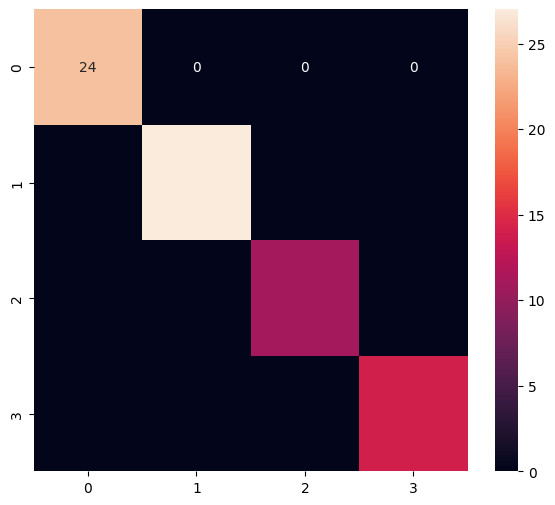

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        14

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [54]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp1knxi5qd\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp1knxi5qd\assets


4992

# Inference test

In [56]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [57]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [58]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [59]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [60]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9995899e-01 3.3619998e-09 1.6828604e-08 4.0982344e-05]
0
